# Sensitivity and Discovery Potential for Gen2 scaled with angular resolution

In [133]:
import sys
sys.path.append('/Users/federica/Documents/DESY/ICECUBE_PhD/ANALYSIS/Gen2SensitivityStudy/gen2_analysis/')
# sys.path.append('/Users/jakob/Documents/IceCube/metaprojects/icerec-lite/src/gen2_analysis/')

In [134]:
%pylab inline
from toolz import partial

Populating the interactive namespace from numpy and matplotlib


/anaconda3/envs/gen2-analysis/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f', 'plotting']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


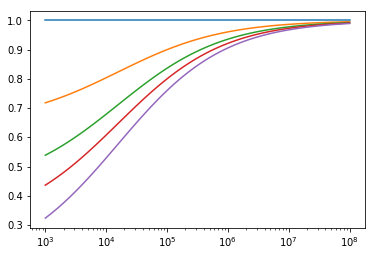

In [136]:
from functools import partial
b = lambda x: -0.82 + 14.54/x
med = lambda emu, b: 0.11 + b/sqrt(emu)
ares_scale = lambda emu, scale: med(emu, b(scale))/med(emu, b(1))
emu = logspace(3, 8, 101)
for scale in [1.0, 1.5, 2.2, 3.0, 5.0]:
    semilogx(emu, ares_scale(emu, scale))

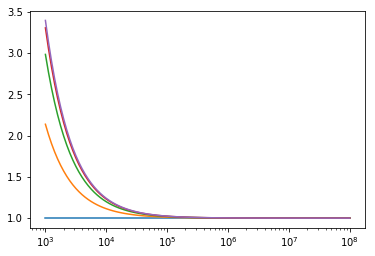

In [137]:
from scipy import interpolate
def efficiency_correction(energy, scale):
    x, y = [1.0, 1.5, 2.2, 3.0, 5.0], [   -0.,  1138.,  1985.,  2307.,  2397.]
    b = interpolate.interp1d(x, y, 2)(scale)
    return 1 + b/energy
for scale in [1.0, 1.5, 2.2, 3.0, 5.0]:
    semilogx(emu, efficiency_correction(emu, scale))

In [138]:
from gen2_analysis import angular_resolution, effective_areas, factory, figures_of_merit, plotting

In [139]:
factory.add_configuration('IceCube',
    factory.make_options(geometry='IceCube', spacing=125,
                         veto_area=1., veto_threshold=1e5,
                         cascade_energy_threshold=None, # no cascades
                        ),
    cos_theta=linspace(-1, 1, 20), psi_bins=linspace(0, radians(2), 200))

## Seg-SplineMPE - SplineMPE angular resolution scale

In [141]:
# My Data
en = np.asarray([1.00000000e+04, 3.16227766e+04, 1.00000000e+05, 3.16227766e+05,
 1.00000000e+06, 3.16227766e+06, 1.00000000e+07, 3.16227766e+07, 1.00000000e+08])
ratio = np.asarray([1.02457269, 0.99996619, 0.93171261, 0.81247204, 0.75638201, 0.72108174,
 0.74216288, 0.75127202, 0.79985065]) # median_ssmpe/median_mpe

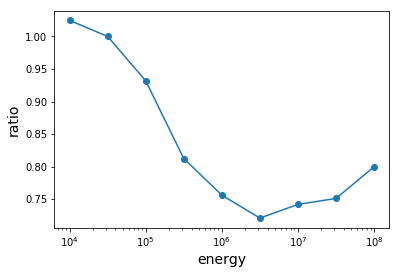

In [144]:
plt.plot(en, ratio, ls='-', marker='o')
plt.ylabel('ratio', size=14)
plt.xlabel('energy', size=14)
plt.xscale(u'log')

In [146]:
import scipy.optimize as optimization

# functions to fit
def second_deg_poly(x, a, b, c):
    """second degree polynomial"""
    return a * np.power(x, 2) + b * x + c

def third_deg_poly(x, a, b, c, d):
    """third degree polynomial"""
    return a * np.power(x, 3) + b * np.power(x, 2) + c * x + d

Text(0.5,0,'log10(energy)')

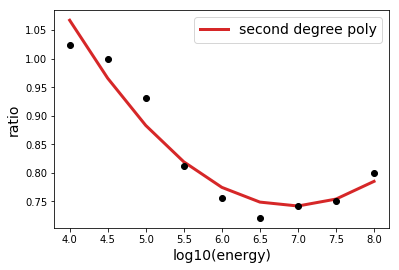

In [150]:
# Second order fit
log10_en = np.log10(en)
fit_result_second_deg = optimization.curve_fit(second_deg_poly, log10_en, ratio)

a_second_deg = fit_result_second_deg[0][0]
b_second_deg = fit_result_second_deg[0][1]
c_second_deg = fit_result_second_deg[0][2]

plt.plot(log10_en, second_deg_poly(log10_en, a_second_deg, b_second_deg, c_second_deg), 
         ls='-', lw=3, color='C3', label='second degree poly')

plt.plot(log10_en, ratio, ls='', marker='o', color='k')
plt.legend(fontsize=14)
plt.ylabel('ratio', size=14)
plt.xlabel('log10(energy)', size=14)

Text(0.5,0,'log10(energy)')

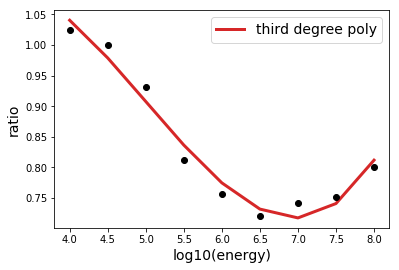

In [151]:
fit_result_third_deg = optimization.curve_fit(third_deg_poly, log10_en, ratio)

a_third_deg = fit_result_third_deg[0][0]
b_third_deg = fit_result_third_deg[0][1]
c_third_deg = fit_result_third_deg[0][2]
d_third_deg = fit_result_third_deg[0][3]

plt.plot(log10_en, third_deg_poly(log10_en, a_third_deg, b_third_deg, c_third_deg, d_third_deg), 
         ls='-', lw=3, color='C3', label='third degree poly')

plt.plot(log10_en, ratio, ls='', marker='o', color='k')
plt.legend(fontsize=14)
plt.ylabel('ratio', size=14)
plt.xlabel('log10(energy)', size=14)

Text(0.5,0,'log10(energy)')

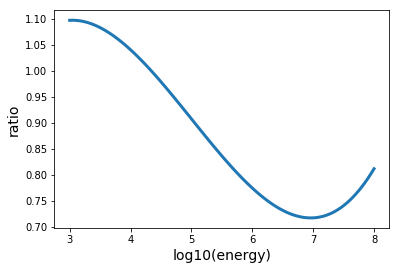

In [153]:
xen = np.linspace(3,8,101)
plt.plot(xen, third_deg_poly(xen, a_third_deg, b_third_deg, c_third_deg, d_third_deg), lw='3')
plt.ylabel('ratio', size=14)
plt.xlabel('log10(energy)', size=14)

In [154]:
import toolz
@toolz.memoize
def horizontal_sensitivity(scale_factor=1, gamma=-2.0):
    factory.add_configuration('Sunflower_240',
        factory.make_options(geometry='Sunflower', spacing=240, veto_area=75.,
                         veto_threshold=1e5,
                         cascade_energy_threshold=None, # no cascades
#                          angular_resolution_scale=lambda emu: scale_factor*numpy.ones(emu.shape),
                         angular_resolution_scale=lambda emu: third_deg_poly(np.log10(emu), a_third_deg, b_third_deg, c_third_deg, d_third_deg),
#                              angular_resolution_scale=val,
                         efficiency_scale=partial(efficiency_correction, scale=area_scale),
                            ),
        cos_theta=linspace(-1, 1, 20), psi_bins=linspace(0, radians(2), 200))
    ps = figures_of_merit.PointSource({'Sunflower_240': 15}, 9)
    fixed = dict(atmo=1, prompt=2, astro=2)
    return ps.benchmark(figures_of_merit.TOT.dp, gamma=gamma)

In [155]:
angular_resolution_scale=third_deg_poly(np.log10(emu), a_third_deg, b_third_deg, c_third_deg, d_third_deg)

In [156]:
angular_resolution_scale.shape

(101,)

In [157]:
an = x*numpy.ones(emu.shape)

In [158]:
an.shape

(101,)

In [160]:
area_scale = 1
'''
horizontal_sensitivity(1) for the scale factor of 1
replace `lambda emu: scale_factor*numpy.ones(emu.shape)` with your actual PSF scale
scale factor = 1 means that the PSF is the same. 0.5 means that you assume a PSF whose CDF'
has the same value as the real CDF evaluated at twice the angle. 
e.g. the median goes from 1 degree to 0.5 degrees
scale factor =1 would be if we use SplineMPE
and you should derive the scale factors from the ratio between your opening angles and MPE’s
'''
horizontal_sensitivity(1) 

ValueError: operands could not be broadcast together with shapes (19,100,200) (101,) 